# ChunkedGraph performance - Figure 2 & Extended Data Figure 2

This notebook creates the performance plots presented in Figure 2 & Extended Data Figure 2 of the CAVE paper.

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

## Define relevant paths and create directories


In [2]:
data_dir = f"{os.path.realpath('')}/../data"
figure2_dir = f"{os.path.realpath('')}/../figures/figure_2/"
extfigure2_dir = f"{os.path.realpath('')}/../figures/extfigure_2/"

if not os.path.exists(figure2_dir):
    os.makedirs(figure2_dir)
if not os.path.exists(extfigure2_dir):
    os.makedirs(extfigure2_dir)

In [3]:
cmap_dict = {
    "split": "k", "merge": ".6",
    "leaves_many": "k", "root": ".6",
}

## Load data

In [4]:
flywire_logs = pd.read_csv(f"{data_dir}/flywire_proofreading_logs.csv")
microns_logs = pd.read_csv(f"{data_dir}/microns_proofreading_logs.csv")

In [5]:
flywire_logs["time_s"] = flywire_logs["time_ms"] / 1000.
microns_logs["time_s"] = microns_logs["time_ms"] / 1000.

## Data overview

Below are summaries of server-side measurements of real requests using the PCGv2.

### MICrONS65

In [6]:
microns_logs.groupby("kind").aggregate({"time_ms": [("N", len), "min", "median", "mean", ("p95", lambda x: np.percentile(x,95)), ("p99", lambda x: np.percentile(x,99)), "max"]})

time_ms                                                      \
                  N         min       median         mean           p95   
kind                                                                      
leaves_many  184821    6.888628   104.555845   138.372253    289.631128   
merge         25854  241.667271  4116.114855  4985.267068  10753.231275   
root          91976    0.642776    69.479585    80.354141    198.812842   
split         21920  305.137873  5812.633514  7285.493324  14591.823995   

                                         
                      p99           max  
kind                                     
leaves_many   1288.125181  1.399288e+04  
merge        16131.820440  3.386260e+05  
root           277.960420  2.212261e+04  
split        24698.461993  1.084904e+06

### FlyWire

In [7]:
flywire_logs.groupby("kind").aggregate({"time_ms": [("N", len), "min", "median", "mean", ("p95", lambda x: np.percentile(x,95)), ("p99", lambda x: np.percentile(x,99)), "max"]})

time_ms                                                     \
                  N         min       median         mean          p95   
kind                                                                     
leaves_many   50001    6.638765    55.254936    62.127970   117.892504   
merge          4189  210.468531  2733.613014  2695.638388  4805.116463   
root          13410    0.993013    40.510416    52.686842    82.483518   
split          2875  239.689589  3486.404657  3733.786611  8525.819731   

                                         
                      p99           max  
kind                                     
leaves_many    219.688892   7674.100161  
merge         6590.418921  20124.741554  
root           220.800066  22669.158220  
split        13030.338373  82530.119658

## Plotting

### MICrONS

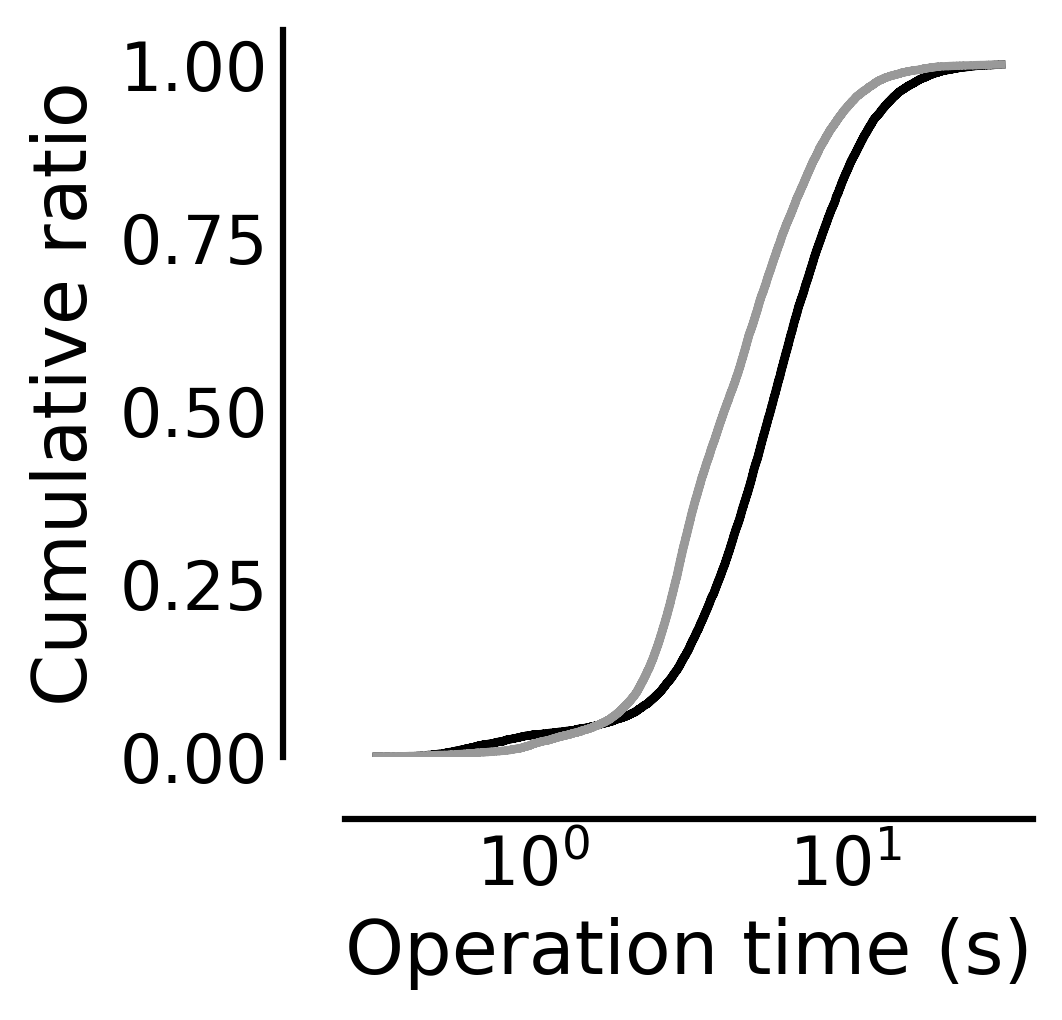

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5), facecolor="white", dpi=300)
plt.tick_params(length=0, width=0, labelsize=16, which="major")
plt.tick_params(length=0, width=0, labelsize=16, which="minor")

for ax in fig.axes:
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(0)
    ax.spines["top"].set_linewidth(0)
    
sns.histplot(data=microns_logs[np.isin(microns_logs["kind"], ["split", "merge"])], x="time_s", cumulative=True, element="step",
             fill=False, bins=np.logspace(-.5, 1.5, 1001), hue="kind", palette=cmap_dict, stat="probability",
             common_norm=False, legend=False, lw=2)
plt.xscale("log")

plt.ylabel("Cumulative ratio", fontsize=18)
plt.xlabel("Operation time (s)", fontsize=18)

sns.despine(offset=15, trim=False)
plt.tight_layout()

plt.savefig(f"{figure2_dir}/microns_edit_times.png", dpi=300)
plt.savefig(f"{figure2_dir}/microns_edit_times.pdf", dpi=300)
plt.show()


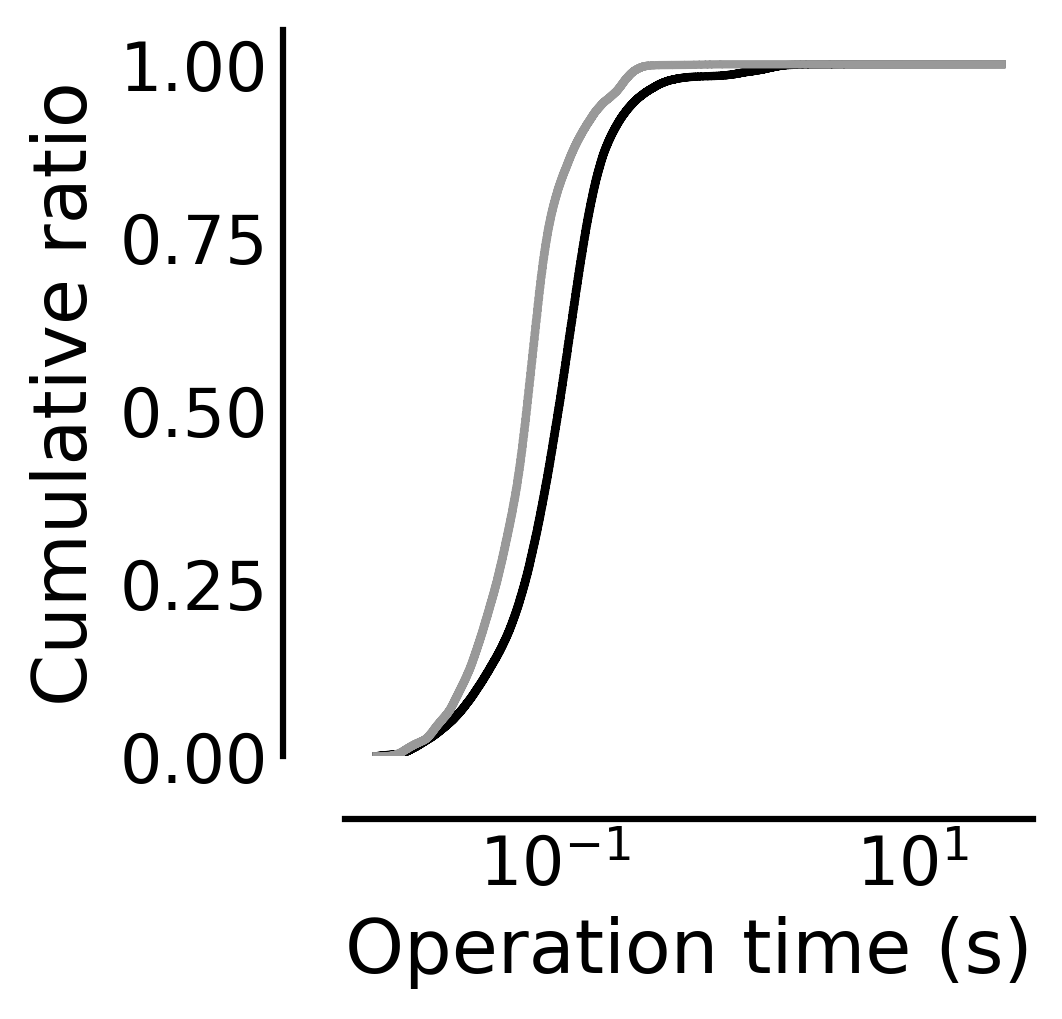

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5), facecolor="white", dpi=300)
plt.tick_params(length=0, width=0, labelsize=16, which="major")
plt.tick_params(length=0, width=0, labelsize=16, which="minor")

for ax in fig.axes:
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(0)
    ax.spines["top"].set_linewidth(0)
    
sns.histplot(data=microns_logs[np.isin(microns_logs["kind"], ["leaves_many", "root"])], 
             x="time_s", cumulative=True, element="step",
             fill=False, bins=np.logspace(-2, 1.5, 1001), 
             hue="kind", palette=cmap_dict, stat="probability",
             common_norm=False, legend=False, lw=2)
plt.xscale("log")

plt.ylabel("Cumulative ratio", fontsize=18)
plt.xlabel("Operation time (s)", fontsize=18)

sns.despine(offset=15, trim=False)

plt.tight_layout()
plt.savefig(f"{figure2_dir}/microns_query_times.png", dpi=300)
plt.savefig(f"{figure2_dir}/microns_query_times.pdf", dpi=300)
plt.show()


### FlyWire

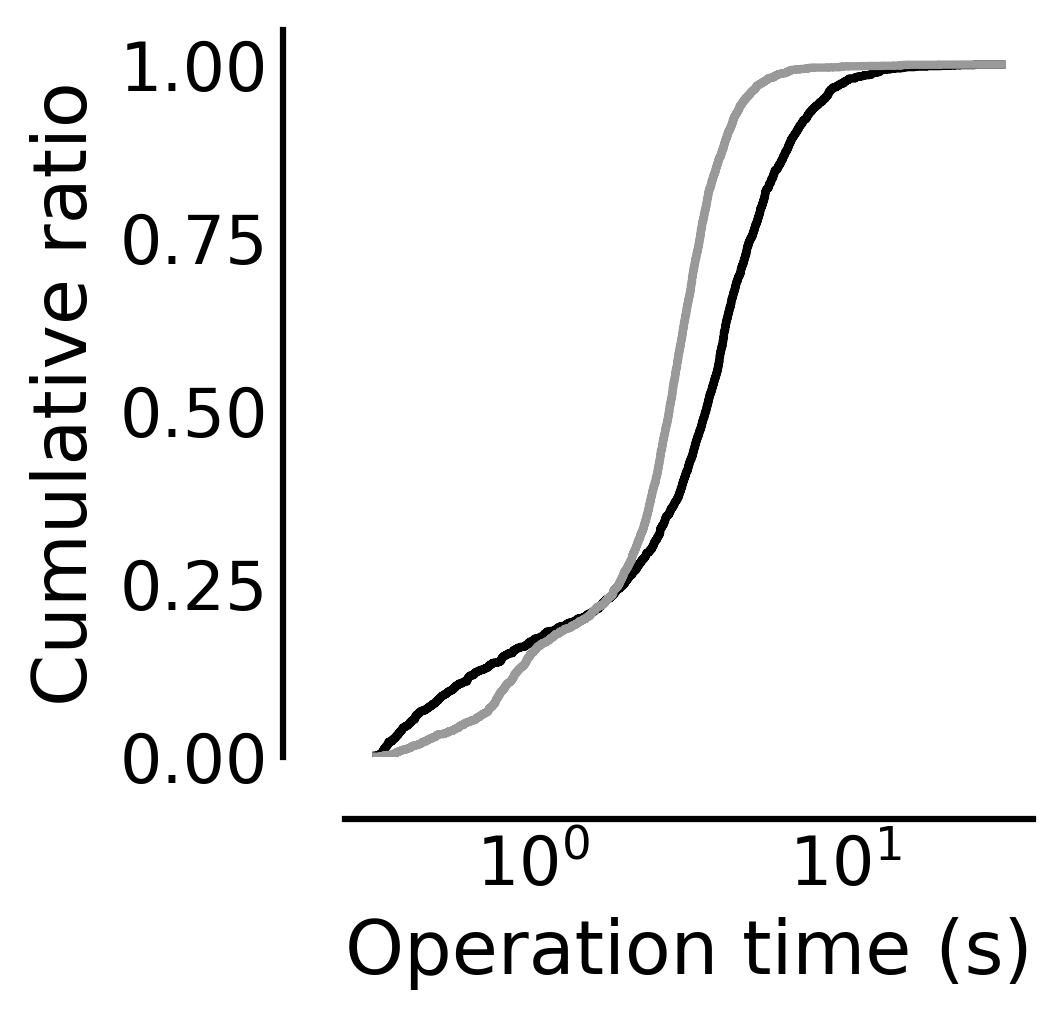

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5), facecolor="white", dpi=300)
plt.tick_params(length=0, width=0, labelsize=16, which="major")
plt.tick_params(length=0, width=0, labelsize=16, which="minor")

for ax in fig.axes:
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(0)
    ax.spines["top"].set_linewidth(0)
    
sns.histplot(data=flywire_logs[np.isin(flywire_logs["kind"], ["split", "merge"])], x="time_s", cumulative=True, element="step",
             fill=False, bins=np.logspace(-.5, 1.5, 1001), hue="kind", palette=cmap_dict, stat="probability",
             common_norm=False, legend=False, lw=2)
plt.xscale("log")

plt.ylabel("Cumulative ratio", fontsize=18)
plt.xlabel("Operation time (s)", fontsize=18)

sns.despine(offset=15, trim=False)
plt.tight_layout()

plt.savefig(f"{extfigure2_dir}/flywire_edit_times.png", dpi=300)
plt.savefig(f"{extfigure2_dir}/flywire_edit_times.pdf", dpi=300)
plt.show()


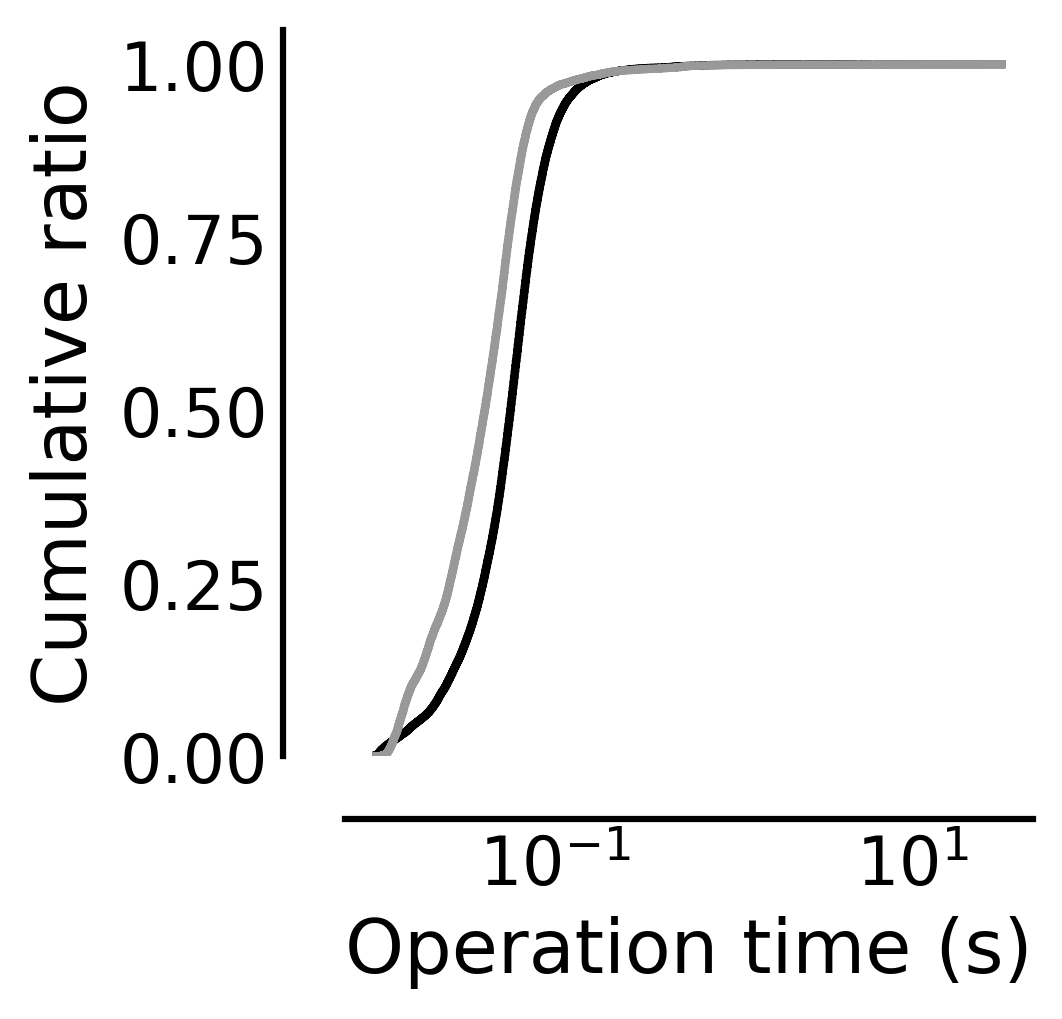

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3.5), facecolor="white", dpi=300)
plt.tick_params(length=0, width=0, labelsize=16, which="major")
plt.tick_params(length=0, width=0, labelsize=16, which="minor")

for ax in fig.axes:
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(0)
    ax.spines["top"].set_linewidth(0)
    
sns.histplot(data=flywire_logs[np.isin(flywire_logs["kind"], ["leaves_many", "root"])], 
             x="time_s", cumulative=True, element="step",
             fill=False, bins=np.logspace(-2, 1.5, 1001), 
             hue="kind", palette=cmap_dict, stat="probability",
             common_norm=False, legend=False, lw=2)
plt.xscale("log")

plt.ylabel("Cumulative ratio", fontsize=18)
plt.xlabel("Operation time (s)", fontsize=18)

sns.despine(offset=15, trim=False)

plt.tight_layout()
plt.savefig(f"{extfigure2_dir}/flywire_query_times.png", dpi=300)
plt.savefig(f"{extfigure2_dir}/flywire_query_times.pdf", dpi=300)
plt.show()
